In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import random

df = pd.read_csv("flaredown_trackable_data_080316.csv")
df['checkin_date'] = pd.to_datetime(df['checkin_date'])

print df.head(10)

   user_id checkin_date  trackable_id trackable_type      trackable_name  \
0        3   2015-11-26          1069      Condition  Ulcerative colitis   
1        6   2015-11-26          1069      Condition  Ulcerative colitis   
2        8   2015-06-22           269      Condition     Crohn's disease   
3        9   2015-05-26           421      Condition       Gastroparesis   
4        9   2015-05-26           152        Symptom              Nausea   
5        9   2015-05-26          9890      Treatment              Zofran   
6        9   2015-05-26             1            Tag               tired   
7        9   2015-05-26             2            Tag            stressed   
8        9   2015-05-26             3            Tag               feels   
9        9   2015-05-27           421      Condition       Gastroparesis   

  trackable_value  
0               0  
1               0  
2               3  
3               2  
4               1  
5          8.0 mg  
6             NaN  
7  

In [68]:
crohns_df = df.groupby(['user_id', 'checkin_date']).filter(lambda x: ('Crohn\'s disease' in x['trackable_name'].values) or ('Crohn\'s' in x['trackable_name'].values))

In [69]:
print str(len(crohns_df.groupby('user_id'))) + " distinct users reporting crohns"

113 distinct users reporting crohns


In [70]:
crohns_treatments = set(crohns_df[crohns_df['trackable_type'] == 'Treatment']['trackable_name'])
crohns_df['treatment_count'] = crohns_df[crohns_df['trackable_type'] == 'Treatment'].groupby('user_id')['trackable_name'].transform('count')
print "distinct treatments : " + str(len(crohns_treatments))
treatment_counts = {}
for treatment in crohns_treatments:
    treat_df = crohns_df[crohns_df['trackable_name'] == treatment]
    treatment_counts[treatment] = len(treat_df.groupby('user_id'))
print ""
print "number of users using each treatment"
import operator 
sorted_treatments = sorted(treatment_counts.items(), key=operator.itemgetter(1), reverse=True)
print sorted_treatments

distinct treatments : 71

number of users using each treatment
[('Azathioprine', 12), ('Prednisone', 10), ('Vitamin d', 6), ('Humira', 5), ('Prednisolone', 4), ('Imuran', 4), ('Budesonide', 4), ('Allopurinol', 4), ('Folic acid', 3), ('Tramadol', 3), ('Entocort', 3), ('Prozac', 2), ('Questran', 2), ('Peppermint oil', 2), ('Coffee', 2), ('7-keto-dhea', 2), ('Lialda', 2), ('Dexamethasone', 2), ('Probiotic', 2), ('Colesevelam', 2), ('Vitamin C', 2), ('Bentyl', 2), ('Olive oil', 2), ('Calcium citrate', 2), ('Marijuana', 2), ('Methotrexate', 2), ('Ritalin', 1), ('Sunbathing', 1), ('Lansoprazole', 1), ('Mediterranean Diet', 1), ('Sertraline', 1), ('Biest', 1), ('Calcium Suplment', 1), ('Amitriptyline', 1), ('Lithium', 1), ('My Goodness Organics meals', 1), ('Solifenacin', 1), ('Flo-pred', 1), ('accutane', 1), ('6-MP', 1), ('Tylenol 3', 1), ('Feverfew', 1), ('Wellbutrin', 1), ('Carbomer eye drops', 1), ('Vitamin b12', 1), ('Rice protein Shake', 1), ('methotraxate', 1), ('Cerelle', 1), ('Mercap

Somebody is self-reporting "placebo"? 

In [59]:
crohns_treatments = set(crohns_df[crohns_df['trackable_type'] == 'Tag']['trackable_name'])
crohns_df['treatment_count'] = crohns_df[crohns_df['trackable_type'] == 'Tag'].groupby('user_id')['trackable_name'].transform('count')
print "distinct tags : " + str(len(crohns_treatments))
treatment_counts = {}
for treatment in crohns_treatments:
    treat_df = crohns_df[crohns_df['trackable_name'] == treatment]
    treatment_counts[treatment] = len(treat_df.groupby('user_id'))
print ""
print "number of users using each tag"
import operator 
sorted_treatments = sorted(treatment_counts.items(), key=operator.itemgetter(1), reverse=True)
print sorted_treatments

print str(treatment_counts['tired'] / 113.0 * 100.0) + " percent of users with Crohn's report being tired"
print str(treatment_counts['stressed'] / 113.0 * 100.0) + " percent of users with Crohn's report being stressed"

distinct tags : 377

number of users using each tag
[('tired', 43), ('stressed', 27), ('good sleep', 18), ('alcohol', 11), ('Migraine', 10), ('had sex', 7), ('ate breakfast', 7), ('Went to work', 7), ('walked', 7), ('bad sleep', 6), ('happy', 6), ('relaxed', 6), ('Superlong nap', 5), ('active', 4), ('hiking', 4), ('period', 4), ('gluten', 4), ('dairy', 3), ('exercise', 3), ('busy', 3), ('worried', 3), ('Weight loss', 3), ('worked', 3), ('Cold', 3), ('cleaning', 3), ('Anxious', 3), ('no work', 3), ('Broke VLCD', 2), ('packing', 2), ('slept in', 2), ('chocolate', 2), ('doctor appointment', 2), ('work', 2), ('restless sleep', 2), ('slimfast', 2), ('Late lunch', 2), ('painful', 2), ('anaphylactic shock', 2), ('bronchitis', 2), ('pain', 2), ('ugh', 2), ('Angry breakup', 2), ('stayed home', 2), ('exam', 2), ('blood test', 2), ('Tired', 2), ('napped', 2), ('coffee', 2), ('carrot sticks', 2), ('VLCD', 2), ('poor sleep', 2), ('have cold', 2), ('bad pain day', 2), ('curry', 2), ('very tired', 2)

In [58]:
crohns_treatments = set(crohns_df[crohns_df['trackable_type'] == 'Condition']['trackable_name'])
crohns_df['treatment_count'] = crohns_df[crohns_df['trackable_type'] == 'Condition'].groupby('user_id')['trackable_name'].transform('count')
print "distinct concurrent conditions : " + str(len(crohns_treatments))
treatment_counts = {}
for treatment in crohns_treatments:
    treat_df = crohns_df[crohns_df['trackable_name'] == treatment]
    treatment_counts[treatment] = len(treat_df.groupby('user_id'))
print ""
print "number of users reporting condition"
import operator 
sorted_treatments = sorted(treatment_counts.items(), key=operator.itemgetter(1), reverse=True)
print sorted_treatments
print ""
print str(treatment_counts['Abdominal pain'] / 113.0 * 100.0) + " percent of users with Crohn's also report Abdominal Pain"
print str(treatment_counts['Fatigue'] / 113.0 * 100.0) + " percent of users with Crohn's also report Fatigue"
print str(treatment_counts['Anxiety'] / 113.0 * 100.0) + " percent of users with Crohn's also report Anxiety"
print str(treatment_counts['Depression'] / 113.0 * 100.0) + " percent of users with Crohn's also report Depression"
print str(treatment_counts['Anemia'] / 113.0 * 100.0) + " percent of users with Crohn's also report Anemia"

distinct concurrent conditions : 85

number of users reporting condition
[("Crohn's disease", 113), ('Abdominal pain', 42), ('Fatigue', 37), ('Anxiety', 22), ('Depression', 16), ('Anemia', 11), ('Migraine', 10), ('Back pain', 10), ('GERD', 8), ('Chronic fatigue syndrome', 6), ('Fibromyalgia', 5), ('Ankylosing spondylitis', 5), ('Insomnia', 5), ('skin rashes', 4), ('Psoriasis', 4), ('Rheumatoid arthritis', 4), ('Ehlers-Danlos syndrome', 4), ('Arthritis', 3), ('Panic', 3), ('Generalized anxiety disorder', 3), ('Endometriosis', 3), ('Allergies', 2), ('Systemic mastocytosis', 2), ('joint pain', 2), ('Urinary Pain', 2), ('fibromyalgia ', 2), ('ADHD', 2), ('adrenal fatigue', 2), ('Adult ADHD', 2), ('Common cold', 2), ('Chronic Migraines', 2), ('Sleep disorders', 2), ('Sacroiliitis', 2), ('POTS', 2), ('Eczema', 2), ('Asthma', 1), ('Orthostatic hypotension (postural hypotension)', 1), ('Irritable bowel syndrome', 1), ('Acne', 1), ('Mast Cell Activation Syndrome', 1), ('Bile Acid Malabsorption'

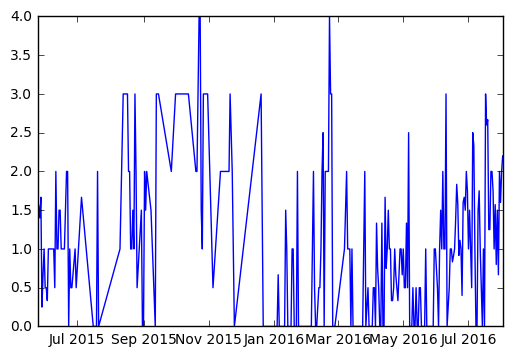

In [52]:
import matplotlib.pyplot as plt
dates = list(set(crohns_df['checkin_date']))
dates.sort()
mean_ratings = []
for date in dates:
    date_df = crohns_df[crohns_df['checkin_date'] == date]
    ratings = pd.to_numeric(date_df[date_df['trackable_name'] == 'Crohn\'s disease']['trackable_value'])
    mean_ratings.append(ratings.values.mean())
plt.plot(dates,mean_ratings)

I wouldn't say that this graph is very informative for the time being.  Would be interesting to take a look again after this winter though, as it looks more consistently high in that September to January range.  Could just be a different person reporting during that time though.

In [82]:
df = pd.read_csv("effectiveness_treatments.csv")
crohns_df = df[(df['condition'] == 'Crohn\'s disease') | (df['condition'] == 'Crohn\'s') ]
crohns_df = crohns_df[np.isfinite(df['effectiveness'])]
print crohns_df.head()

     user_id   age     sex country        condition        treatment  \
319    459.0   NaN  female      US  Crohn's disease           Bentyl   
320    459.0   NaN  female      US  Crohn's disease  Calcium citrate   
321    459.0   NaN  female      US  Crohn's disease        Vitamin d   
342    461.0  38.0    male      US  Crohn's disease           Bentyl   
343    461.0  38.0    male      US  Crohn's disease  Calcium citrate   

     before_value  after_value  effectiveness  
319      1.875000     1.000000       0.875000  
320      1.736842     1.000000       0.736842  
321      1.736842     1.000000       0.736842  
342      1.823529     1.454545       0.368984  
343      1.700000     1.625000       0.075000  


In [83]:
treatments = set(crohns_df['treatment'])
mean_effects = {}
for treatment in treatments:
    treat_df = crohns_df[crohns_df['treatment'] == treatment]
    mean_effects[treatment] = treat_df['effectiveness'].values.mean()

print "the treatments that our users have had the most success with : "
sorted_treatments = sorted(mean_effects.items(), key=operator.itemgetter(1), reverse=True)
print sorted_treatments

the treatments that our users have had the most success with : 
[('Folic acid', 1.26729559748), ('Methotrexate', 1.1818181818200002), ('Bentyl', 0.62199197860950006), ('Colesevelam', 0.45850815850800003), ('Vitamin d', 0.40592105263149997), ('Calcium citrate', 0.40592105263149997), ('Mediterranean Diet', 0.292929292929), ('Placebo', 0.19624060150400002), ('Fexofenadine', 0.18199233716499999), ('Carbomer eye drops', 0.16554054054099998), ('Cetraben cream', 0.16554054054099998), ('thyroid support complex', 0.12121212121200001), ('methotraxate', 0.055555555555600003), ('Questran', 0.0029761904764999819), ('Modulen', -0.084232002331699987), ('Aga', -0.22600619194999999), ('Tacrolimus', -0.22600619194999999), ('Biest', -0.26666666666700001), ('My Goodness Organics meals', -0.26666666666700001), ('Vitamin C', -0.28042328042300002), ('Ritalin', -0.35887988209299998), ('Solifenacin', -0.35887988209299998), ('Feverfew', -0.35887988209299998), ('Probiotic', -0.35887988209299998), ('Passionflower

Positive numbers above mean the user reported less severe symptoms while on the treatment.  Negative numbers mean their symptoms were worse.  But keep in mind that users might be trying more supplements and such during flare-ups which could give an overly negative view of some of these treatments.

Also sample sizes for some of these associations are often very small.